In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from lib.config import config as cfg
from lib.utils.nms_wrapper import nms
from lib.utils.test import im_detect
#from nets.resnet_v1 import resnetv1
from lib.nets.vgg16 import vgg16
from lib.utils.timer import Timer

os.environ["CUDA_VISIBLE_DEVICES"]= '0'

CLASSES = ('__background__',
           'tampered')

# PLEASE specify weight files dir for vgg16
NETS = {'vgg16': ('vgg16_faster_rcnn_iter_30000.ckpt',), 'res101': ('res101_faster_rcnn_iter_110000.ckpt',)}
DATASETS = {'pascal_voc': ('voc_2007_trainval',), 'pascal_voc_0712': ('voc_2007_trainval+voc_2012_trainval',)}


def vis_detections(im, class_name, dets, thresh=0.5):
    """Draw detected bounding boxes."""
    inds = np.where(dets[:, -1] >= thresh)[0]
    if len(inds) == 0:
        return

    im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(im, aspect='equal')
    for i in inds:
        bbox = dets[i, :4]
        score = dets[i, -1]

        ax.add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='red', linewidth=3.5)
        )
        ax.text(bbox[0], bbox[1] - 2,
                '{:s} {:.3f}'.format(class_name, score),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')

    ax.set_title(('{} detections with '
                  'p({} | box) >= {:.1f}').format(class_name, class_name,
                                                  thresh),
                 fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.draw()


def demo(sess, net, image_name):
    """Detect object classes in an image using pre-computed object proposals."""

    # Load the demo image
    im_file = os.path.join('lib/layer_utils', image_name)
    im = cv2.imread(im_file)

    # Detect all object classes and regress object bounds
    timer = Timer()
    timer.tic()
    scores, boxes = im_detect(sess, net, im)
    timer.toc()
    print('Detection took {:.3f}s for {:d} object proposals'.format(timer.total_time, boxes.shape[0]))

    # Visualize detections for each class
    CONF_THRESH = 0.1
    NMS_THRESH = 0.1

    for cls_ind, cls in enumerate(CLASSES[1:]):
        cls_ind += 1  # because we skipped background
        cls_boxes = boxes[:, 4 * cls_ind:4 * (cls_ind + 1)]
        cls_scores = scores[:, cls_ind]
        dets = np.hstack((cls_boxes,
                          cls_scores[:, np.newaxis])).astype(np.float32)
        keep = nms(dets, NMS_THRESH)
        dets = dets[keep, :]
        vis_detections(im, cls, dets, thresh=CONF_THRESH)


def parse_args():
    """Parse input arguments."""
    parser = argparse.ArgumentParser(description='Tensorflow Faster R-CNN demo')
    parser.add_argument('--net', dest='demo_net', help='Network to use [vgg16 res101]',
                        choices=NETS.keys(), default='vgg16')
    parser.add_argument('--dataset', dest='dataset', help='Trained dataset [pascal_voc pascal_voc_0712]',
                        choices=DATASETS.keys(), default='pascal_voc_0712')
    args = parser.parse_args(args=[])

    return args



/home/duxiaowey/miniconda3/envs/Ps/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/duxiaowey/miniconda3/envs/Ps/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/duxiaowey/miniconda3/envs/Ps/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/duxiaowey/miniconda3/envs/Ps/lib/python3

In [2]:
args = parse_args()


In [3]:

# model path
demonet = args.demo_net
dataset = args.dataset
tfmodel = os.path.join('default', 'DIY_dataset', 'default', NETS[demonet][0])

if not os.path.isfile(tfmodel + '.meta'):
    print(tfmodel)
    raise IOError(('{:s} not found.\nDid you download the proper networks from '
                   'our server and place them properly?').format(tfmodel + '.meta'))

# set config
tfconfig = tf.ConfigProto(allow_soft_placement=True)
tfconfig.gpu_options.allow_growth = True

tf.app.flags.DEFINE_string('f', '', 'kernel')

INFO:tensorflow:Restoring parameters from default/DIY_dataset/default/vgg16_faster_rcnn_iter_30000.ckpt
Loaded network default/DIY_dataset/default/vgg16_faster_rcnn_iter_30000.ckpt
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for lib/layer_utils/Sp_D_NNN_A_txt0062_txt0060_0149.jpg
Detection took 3.396s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for lib/layer_utils/Sp_D_CRN_A_sec0083_ani0039_0401.jpg
Detection took 0.098s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for lib/layer_utils/Sp_D_NRN_A_ani0082_ani0097_0427.jpg
Detection took 0.108s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for lib/layer_utils/Sp_D_CRN_A_pla0006_pla0009_0391.jpg
Detection took 0.103s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for lib/layer_utils/Sp_D_NNN_R_arc0088_arc0088_0367.jpg
Detection took 0.667s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for lib/layer_utils/000009.jpg
Detection took 0.572s for 3

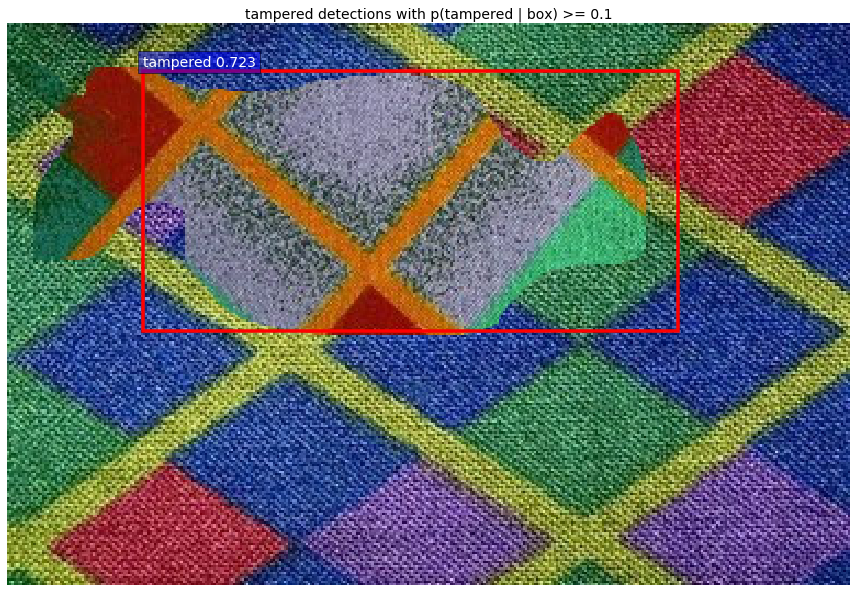

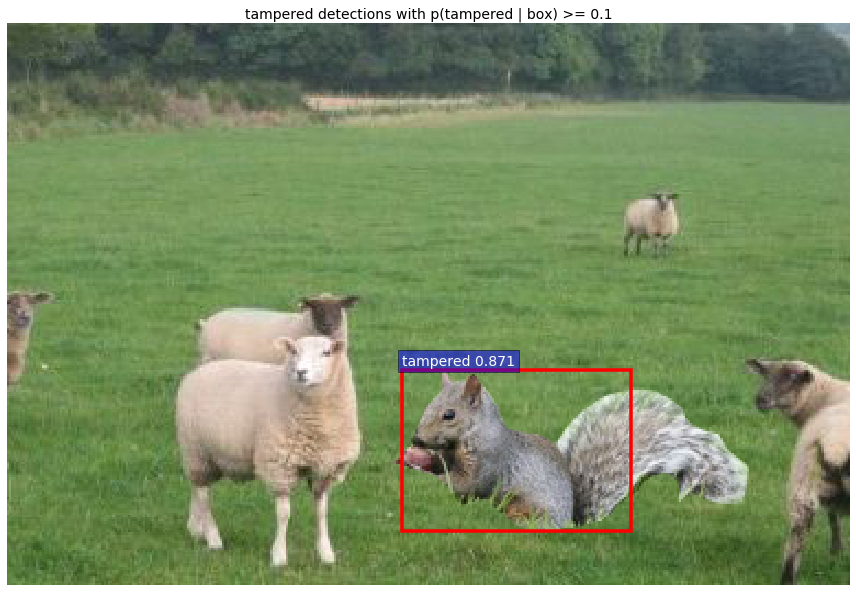

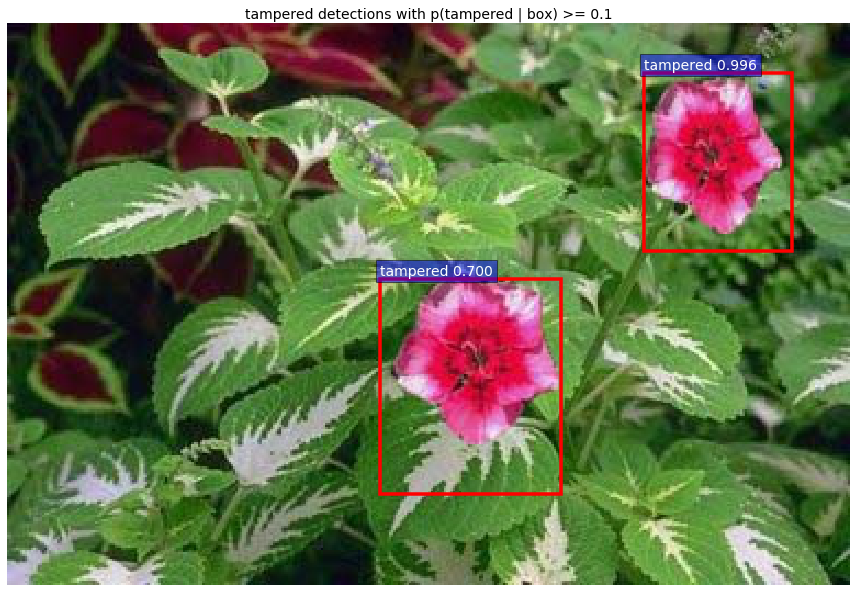

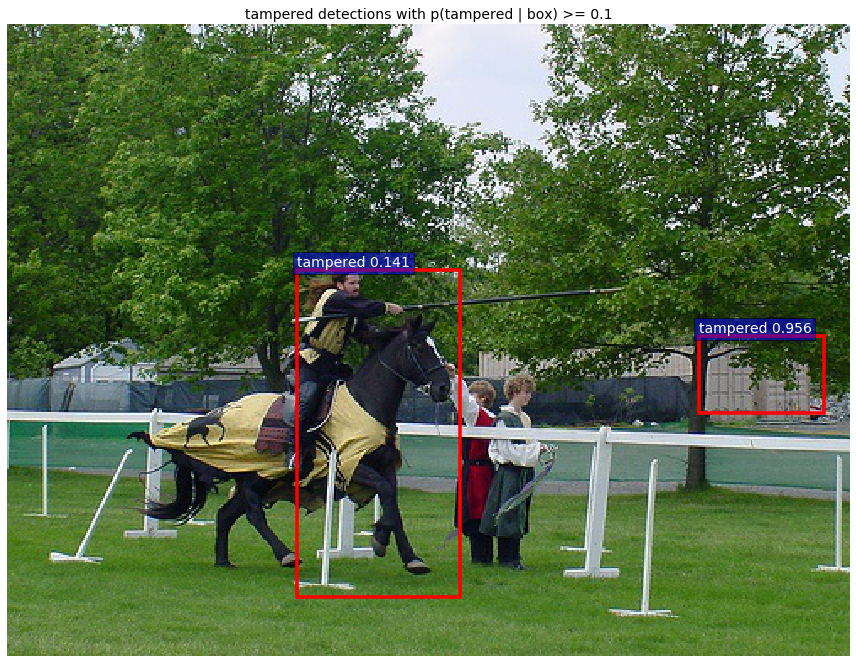

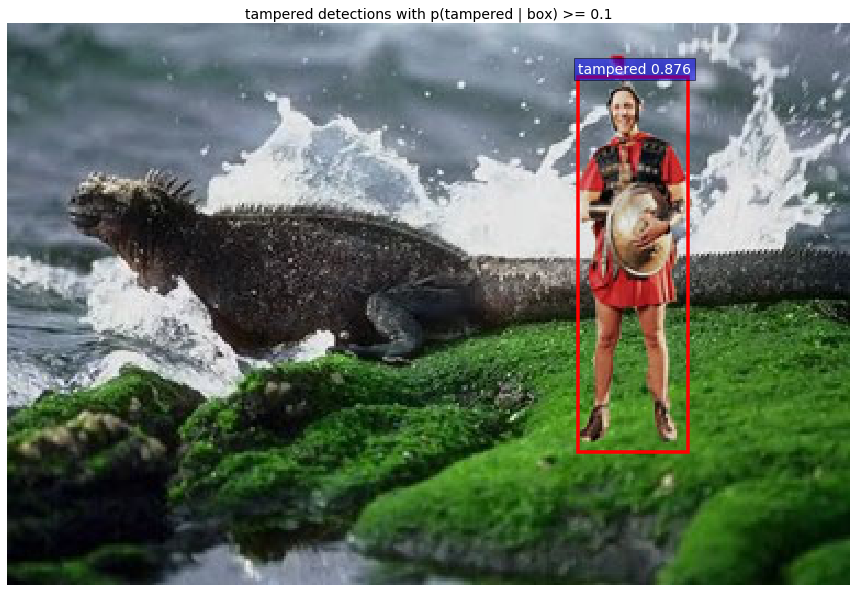

In [4]:
# init session
sess = tf.Session(config=tfconfig)
# load network
if demonet == 'vgg16':
    net = vgg16(batch_size=1)
# elif demonet == 'res101':
    # net = resnetv1(batch_size=1, num_layers=101)
else:
    raise NotImplementedError
net.create_architecture(sess, "TEST", 2 ,tag='default', anchor_scales=[8, 16, 32])
saver = tf.train.Saver()
saver.restore(sess, tfmodel)

print('Loaded network {:s}'.format(tfmodel))

for file in os.listdir("./lib/layer_utils"):
    if file.endswith(".jpg"):
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('Demo for lib/layer_utils/{}'.format(file))
        demo(sess, net, file)


plt.show()